In [1]:
import os

In [2]:
#Directory with Good Metal Surface
good_dir = os.path.join('../SurfaceAnomaly/Train/Good')

In [3]:
#Directory with Bad Metal Surface
bad_dir = os.path.join('../SurfaceAnomaly/Train/Bad')

In [4]:
train_good = os.listdir(good_dir)
print(train_good[:5])

train_bad = os.listdir(bad_dir)
print(train_bad[:5])

['IMG_20190920_113013.jpg', 'IMG_20190920_112548.jpg', 'IMG_20190920_112440.jpg', 'IMG_20190920_111948.jpg', 'IMG_20190920_112544.jpg']
['IMG_20190920_112947.jpg', 'IMG_20190920_112923.jpg', 'IMG_20190920_113005.jpg', 'IMG_20190920_112823.jpg', 'IMG_20190920_112405.jpg']


In [5]:
print('total good images:', len(os.listdir(good_dir)))
print('total bad images:', len(os.listdir(bad_dir)))

total good images: 40
total bad images: 28


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Example Good Images...



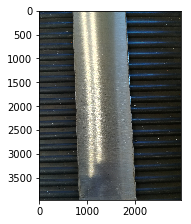

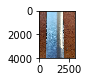

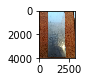

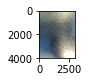

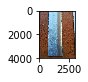

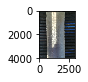

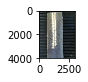

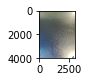

Example Bad Images...



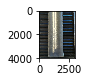

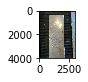

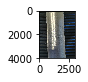

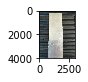

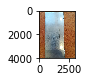

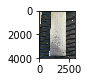

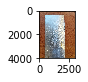

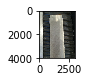

In [7]:
#Graph parameters
nrows = 4
ncols = 4

# Index for iteration
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_good_pix = [os.path.join(good_dir, fname) for fname in train_good[pic_index-8:pic_index]]
next_bad_pix = [os.path.join(bad_dir, fname) for fname in train_bad[pic_index-8:pic_index]]

print ("Example Good Images...")
print()
for i, img_path in enumerate(next_good_pix):
    #Set-up subplot - indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('on')  #show grid
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
    plt.show()
    
print ("Example Bad Images...")
print()
for i, img_path in enumerate(next_bad_pix):
    #Set-up subplot - indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('on')  #show grid
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
    plt.show()

In [13]:
def train_CNN(train_directory, target_size=(200, 200), classes=None,
              batch_size=4, num_epochs = 10, num_classes=2, verbose=0):
    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop

    #All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(rescale=1/255)

    #Flow training images in batches of 16 using train_datagen
    train_generator = train_datagen.flow_from_directory(train_directory, 
                            target_size=target_size, batch_size=batch_size,
                            classes = classes, class_mode= 'categorical')
    
    #input_shape = tuple(list(target_size) +[3])
    
    #model architecture
    model = tf.keras.models.Sequential([
    #First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourthconvolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    #16 neuron in the fully-connected layer
    tf.keras.layers.Dense(16, activation='relu'),
    #2 output neurons for 2 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')    
    ])
    
    #Optimizer and compilation
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])
    
    #Total sample count
    total_sample=train_generator.n
    
    #Training
    history = model.fit_generator(train_generator, steps_per_epoch=int(total_sample/batch_size),
                              epochs=num_epochs, verbose=verbose)
    
    

    plt.figure(figsize=(7,4))
    plt.plot([i+1 for i in range(num_epochs)],history.history['acc'], 'r', lw=2, markersize=9)
    plt.grid(True)
    plt.title("Training accuracy with epochs/n", fontsize=18)
    plt.xlabel("Training epochs", fontsize=15)
    plt.ylabel("Training accuracy", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot([i+1 for i in range(num_epochs)],history.history['loss'], 'b', lw=2, markersize=9)
    plt.grid(True)
    plt.title("Training loss with epochs/n", fontsize=18)
    plt.xlabel("Training epochs", fontsize=15)
    plt.ylabel("Training loss", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    
    return model

Found 68 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 20s 1s/step - loss: 0.7166 - acc: 0.5882
Epoch 2/10
17/17 [==============================] - 20s 1s/step - loss: 0.6937 - acc: 0.5882
Epoch 3/10
17/17 [==============================] - 20s 1s/step - loss: 0.6875 - acc: 0.5882
Epoch 4/10
17/17 [==============================] - 20s 1s/step - loss: 0.6962 - acc: 0.6176
Epoch 5/10
17/17 [==============================] - 19s 1s/step - loss: 0.6960 - acc: 0.5882
Epoch 6/10
17/17 [==============================] - 20s 1s/step - loss: 0.6931 - acc: 0.5588
Epoch 7/10
17/17 [==============================] - 19s 1s/step - loss: 0.6907 - acc: 0.5882
Epoch 8/10
17/17 [==============================] - 20s 1s/step - loss: 0.6943 - acc: 0.5882
Epoch 9/10
17/17 [==============================] - 20s 1s/step - loss: 0.6835 - acc: 0.5882
Epoch 10/10
17/17 [==============================] - 20s 1s/step - loss: 0.6872 - acc: 0.5882


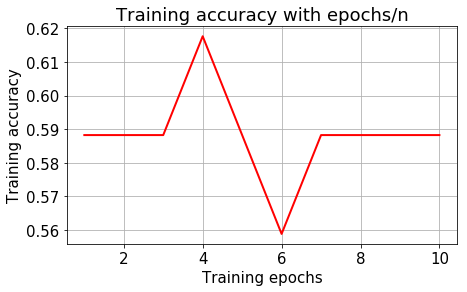

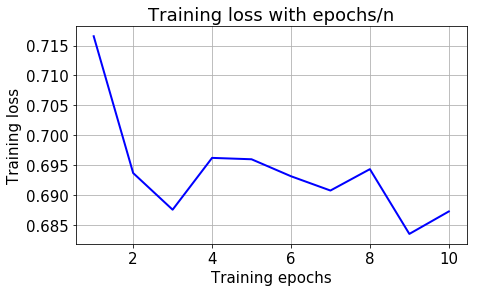

In [14]:
train_directory = '../SurfaceAnomaly/Train'
batch_size = 4
target_size = (200,200)
model_surface = train_CNN(train_directory, target_size=(200, 200), classes=['Good', 'Bad'],
              num_epochs = 10, num_classes=2, verbose=1)

In [ ]:
#plt.figure(figsize=(7,4))
#plt.plot([i+1 for i in range(10)],history.history['acc'], '-c', c='k', lw=2, markersize=9)
#plt.grid(True)
#plt.title("Training accuracy with epochs/n", fontsize=18)
#plt.xlabel("Training epochs", fontsize=15)
#plt.ylabel("Training accuracy", fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.show()

In [ ]:
#plt.figure(figsize=(7,4))
#plt.plot([i+1 for i in range(n_epochs)],history.history['loss'], '-c', c='k', lw=2, markersize=9)
#plt.grid(True)
#plt.title("Training loss with epochs/n", fontsize=18)
#plt.xlabel("Training epochs", fontsize=15)
#plt.ylabel("Training loss", fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.show()

In [39]:
from PIL import Image

In [45]:
img0001=Image.open('../SurfaceAnomaly/Test/IMG_20191108_112200.jpg')
img0002=Image.open('../SurfaceAnomaly/Test/IMG_20191108_112209.jpg')
img0003=Image.open('../SurfaceAnomaly/Test/IMG_20191108_112309.jpg')
img0004=Image.open('../SurfaceAnomaly/Test/IMG_20191108_112448.jpg')

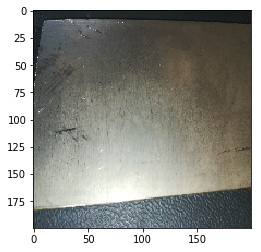

array([[1.0000000e+00, 5.9751325e-13]], dtype=float32)

In [46]:
img0001 = img0001.resize((200,200))
plt.imshow(img0001)
plt.show()
import numpy as np
img0001 = np.expand_dims(img0001,axis=0)
model_surface.predict(img0001)

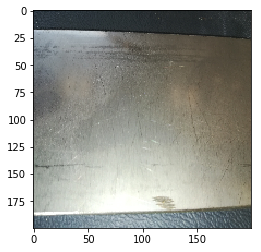

array([[1.0000000e+00, 1.7975341e-12]], dtype=float32)

In [47]:
img0002 = img0002.resize((200,200))
plt.imshow(img0002)
plt.show()
#import numpy as np
img0002 = np.expand_dims(img0002,axis=0)
model_surface.predict(img0002)

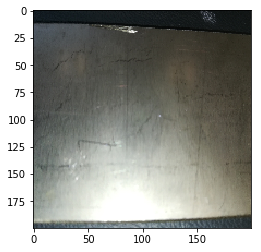

array([[1.0000000e+00, 2.1441663e-11]], dtype=float32)

In [48]:
img0003 = img0003.resize((200,200))
plt.imshow(img0003)
plt.show()
#import numpy as np
img0003 = np.expand_dims(img0003,axis=0)
model_surface.predict(img0003)

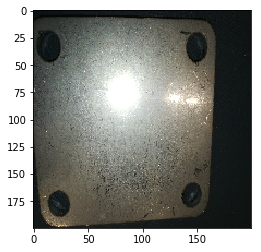

array([[1.000000e+00, 4.909164e-13]], dtype=float32)

In [49]:
img0004 = img0004.resize((200,200))
plt.imshow(img0004)
plt.show()
#import numpy as np
img0004 = np.expand_dims(img0004,axis=0)
model_surface.predict(img0004)